In [26]:
# import all possible packages useful for multiple linear regression
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error as MSE
import warnings
warnings.filterwarnings("ignore")

In [27]:
#Import data set from hard drive
med = pd.read_csv(r"C:\Users\mlaws\OneDrive - Western Governors University\Documents\WGU\D208\medical_clean.csv", skiprows=0, delimiter=",")

In [28]:
#examine the list of variables, their data type and the shape of the data
med.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [29]:
#print the header 
med.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [30]:
#change the values of the ordinal categorical variable to numeric ranks
med['Complication_risk'].unique()
med['Complication_risk'] = med['Complication_risk'].map({'Low':0,'Medium':1,'High':2})

In [31]:
#change all binary categorical values to 0,1
med['ReAdmis'] = med['ReAdmis'].map({'No':0, "Yes":1})
med['Soft_drink'] = med['Soft_drink'].map({'No':0, "Yes":1})
med['HighBlood'] = med['HighBlood'].map({'No':0, "Yes":1})
med['Stroke'] = med['Stroke'].map({'No':0, "Yes":1})
med['Overweight'] = med['Overweight'].map({'No':0, "Yes":1})
med['Arthritis'] = med['Arthritis'].map({'No':0, "Yes":1})
med['Diabetes'] = med['Diabetes'].map({'No':0, "Yes":1})
med['Hyperlipidemia'] = med['Hyperlipidemia'].map({'No':0, "Yes":1})
med['BackPain'] = med['BackPain'].map({'No':0, "Yes":1})
med['Anxiety'] = med['Anxiety'].map({'No':0, "Yes":1})
med['Allergic_rhinitis'] = med['Allergic_rhinitis'].map({'No':0, "Yes":1})
med['Reflux_esophagitis'] = med['Reflux_esophagitis'].map({'No':0, "Yes":1})
med['Asthma'] = med['Asthma'].map({'No':0, "Yes":1})

In [32]:
#Create dummy columns for the Services column
med = pd.get_dummies(med, prefix=['Services','Marital','Gender', 'Initial_admin'], prefix_sep='_', dummy_na=False, columns=["Services","Marital","Gender","Initial_admin"])

In [33]:
#Check whether dummy columns were created
print(med.keys())

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'ReAdmis', 'VitD_levels', 'Doc_visits',
       'Full_meals_eaten', 'vitD_supp', 'Soft_drink', 'HighBlood', 'Stroke',
       'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes',
       'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'Asthma', 'Initial_days', 'TotalCharge',
       'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8', 'Services_Blood Work', 'Services_CT Scan',
       'Services_Intravenous', 'Services_MRI', 'Marital_Divorced',
       'Marital_Married', 'Marital_Never Married', 'Marital_Separated',
       'Marital_Widowed', 'Gender_Female', 'Gender_Male', 'Gender_Nonbinary',
       'Initial_admin_Elective Admission', 'Initial_admin_Emergency Admission',
       'Initial_admin_Observation Admiss

In [34]:
X = med.drop(axis=1, columns=['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job', 'Complication_risk',])
y = med['Complication_risk']

In [35]:
#Split the data into training and test groups
SEED = 944
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=SEED, stratify=y)

In [36]:
#Provide split data files
Training_file = pd.concat([X_train,y_train])
Test_file = pd.concat([X_test,y_test])
Training_file.to_csv(r"C:\Users\mlaws\OneDrive - Western Governors University\Documents\WGU\D209\D209_T2_training_data.csv")
Test_file.to_csv(r"C:\Users\mlaws\OneDrive - Western Governors University\Documents\WGU\D209\D209_T2_test_data.csv")

In [37]:
#Initiate the Random Forest regressor
rf = RandomForestRegressor(n_estimators=300,min_samples_leaf=0.15, oob_score=True, random_state=SEED)
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 0.15,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_jobs': None,
 'oob_score': True,
 'random_state': 944,
 'verbose': 0,
 'warm_start': False}

In [38]:
#Fit rf to training data
rf.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=0.15, n_estimators=300, oob_score=True,
                      random_state=944)

In [39]:
#predict target and assign to y_pred
y_pred = rf.predict(X_test)

In [40]:
#print the RMSE
rmse_test = MSE(y_test,y_pred)**(1/2)
print('Root mean squared error:{:.2f}%'.format(rmse_test*100))

Root mean squared error:71.40%


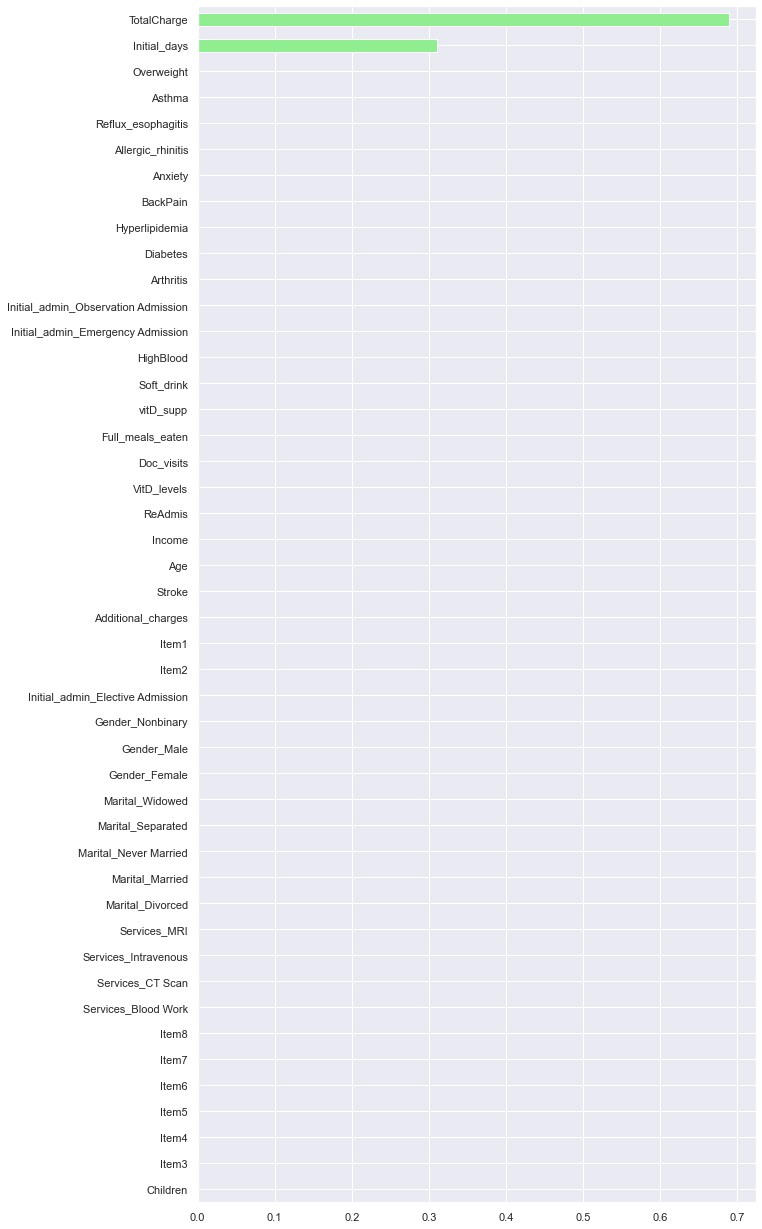

In [41]:
#Visualize the most important explanatory variables
importances_rf = pd.Series(rf.feature_importances_,index=X.columns)
sorted_importances_rf = importances_rf.sort_values()
sns.set(rc = {'figure.figsize':(10,22)})
sorted_importances_rf.plot(kind='barh', color='lightgreen')
plt.show()


In [42]:
#set up parameters for hypertuning
params_rf = {
    'n_estimators': [300,400,500],
    'max_depth': [4,6,8],
    'min_samples_leaf': [0.2,0.4,0.6,0.8]
}

In [43]:
#Perform grid search CV
grid_rf = GridSearchCV(estimator=rf, param_grid=params_rf, cv=3, scoring='neg_mean_squared_error', refit=True, verbose=1,n_jobs=-1)

In [44]:
#Fit grid search cv to training data
grid_rf.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3,
             estimator=RandomForestRegressor(min_samples_leaf=0.15,
                                             n_estimators=300, oob_score=True,
                                             random_state=944),
             n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8],
                         'min_samples_leaf': [0.2, 0.4, 0.6, 0.8],
                         'n_estimators': [300, 400, 500]},
             scoring='neg_mean_squared_error', verbose=1)

In [45]:
#print the best hyperparameters
best_hyperparams = grid_rf.best_params_
print('Best hyperparameters: \n', best_hyperparams)

Best hyperparameters: 
 {'max_depth': 4, 'min_samples_leaf': 0.2, 'n_estimators': 500}


In [46]:
best_model = grid_rf.best_estimator_

In [47]:
y_pred = best_model.predict(X_test)

In [48]:
rmse_test = MSE(y_test,y_pred)**(1/2)

In [49]:
print('Test set RMSE of rf: {:.2f}%'.format(rmse_test*100))

Test set RMSE of rf: 72.41%


In [50]:
#Export prepared data
med.to_csv(r"C:\Users\mlaws\OneDrive - Western Governors University\Documents\WGU\D209\medical_prepared_D209_T2.csv")